<a href="https://colab.research.google.com/github/aukabir/Machine_Learning_project_4/blob/main/Prediction_of_Titanic_Passenger_Survival_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [9]:
df= pd.read_csv('/content/tested.csv')

Understanding the dataset

Preview data

In [10]:
#preview data
df.sample(3)

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Survived
398,1290,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S,3,0
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3,0
279,1171,"Oxenham, Mr. Percy Thomas",male,22.0,0,0,W./C. 14260,10.5000,NaN,S,2,0


Description of dataset

In [11]:
#Description of Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000


In [12]:
#Class distribution
df.groupby('Pclass').size()

Pclass
1    107
2     93
3    218
dtype: int64

Shape of Dataset

In [13]:
#Data Shape
df.shape

(418, 12)

In [18]:
df.columns

Index(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Pclass', 'Survived'],
      dtype='object')

In [19]:
df.dtypes

PassengerId      int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Pclass           int64
Survived         int64
dtype: object

In [20]:
df.isnull().sum()

PassengerId      0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Pclass           0
Survived         0
dtype: int64

# Data visualization

The visualization techniques provide imagery representation of Iris species and feature It is used to determine correlations between the X and Y variables (dependent and independent variables). Now, we are going to visualize the dataset in two ways such as Boxplot, and pairwise joint plot distribution (scatter plot).

<Axes: >

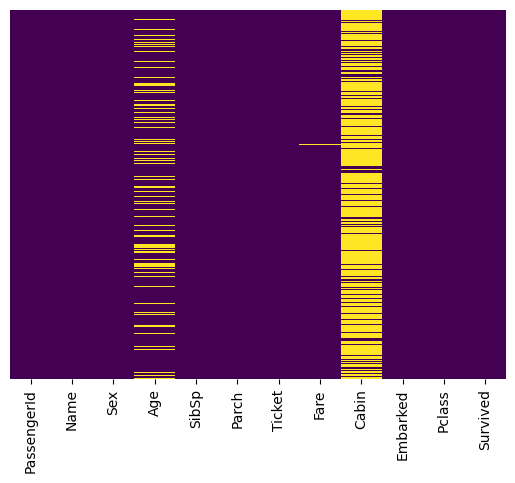

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

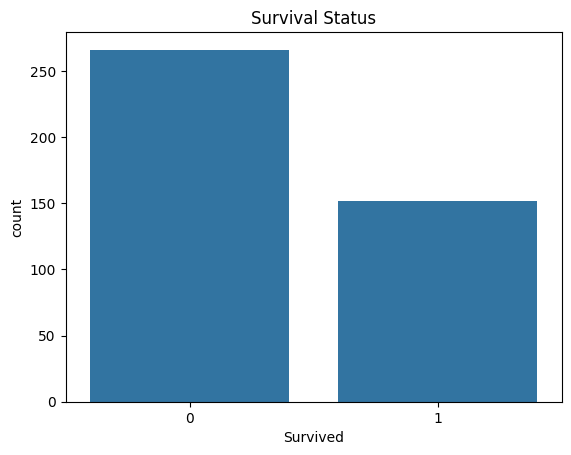

In [24]:
sns.countplot(x=df['Survived'])
plt.title('Survival Status');

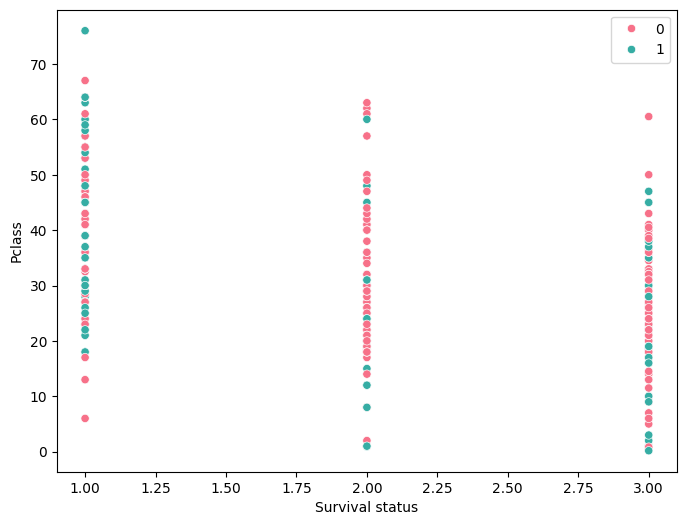

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y=df["Age"] , x=df["Pclass"] ,hue=df["Survived"] ,palette="husl")
plt.xlabel("Survival status")
plt.ylabel("Pclass")
plt.legend()

<Axes: xlabel='Survived', ylabel='count'>

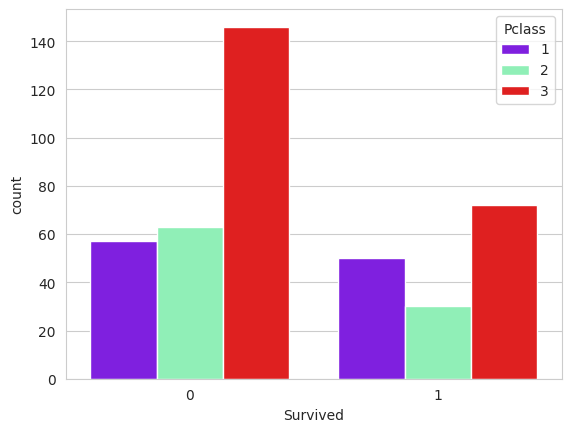

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: title={'center': 'passenger on the titanic '}>

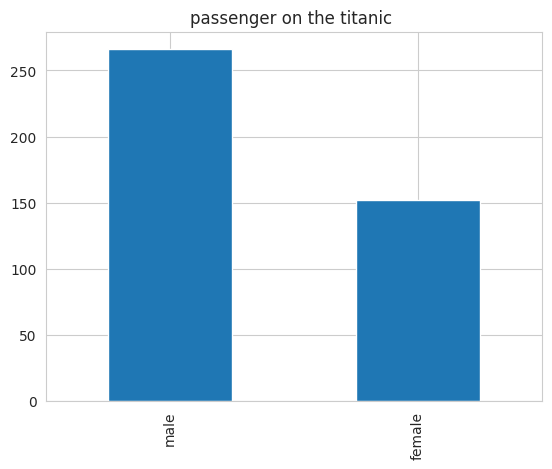

In [28]:
df['Sex']. value_counts().plot.bar(title="passenger on the titanic ")

<Axes: >

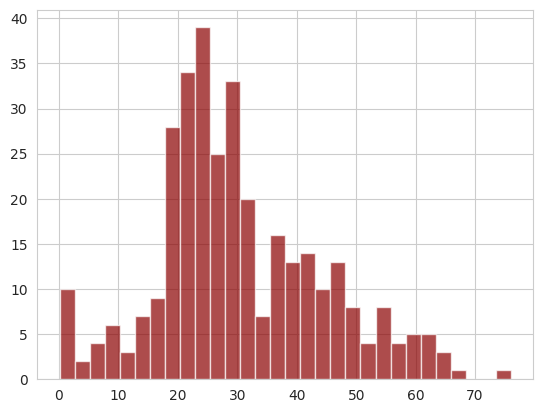

In [29]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

# Prediction

we will predict depend on pclass , sex , age , fare.

In [30]:
df.drop('Cabin',axis=1,inplace=True)
df= df.dropna(subset=['Fare', 'Age'])
df

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass,Survived
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,3,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,3,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,2,0
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,3,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3,1
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S,3,1
411,1303,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q,1,1
412,1304,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,3,1
414,1306,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,1


In [32]:
X=df[["Pclass" , "Sex" , "Age" , "Fare"]]
y=df["Survived"]

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X["Sex"] = encoder.fit_transform(X["Sex"])
X

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875
...,...,...,...,...
409,3,0,3.0,13.7750
411,1,0,37.0,90.0000
412,3,0,28.0,7.7750
414,1,0,39.0,108.9000


In [34]:
y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

<Axes: >

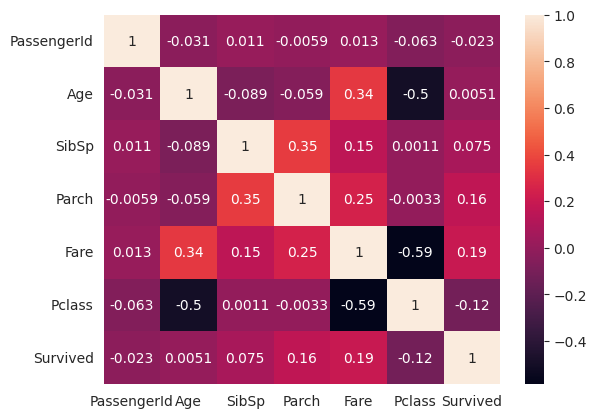

In [38]:
sns.heatmap(df.corr(), annot=True)

# Machine Learning Models

## Logistic Regression

In [70]:
###Classification Models
##Logistic Regression
#Training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Accuracy =  100.0  %


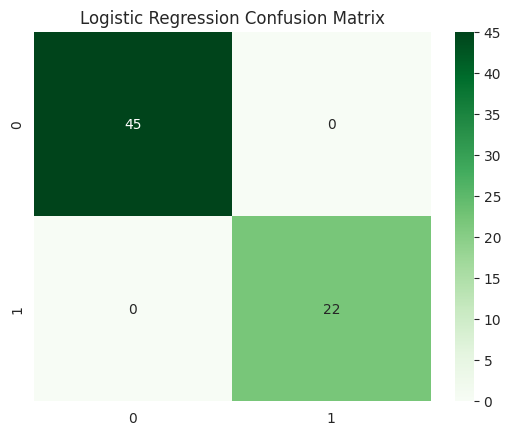

In [71]:
#Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = lr.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',lr_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Greens')
plt.title('Logistic Regression Confusion Matrix');

# Decision Tree

In [44]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Accuracy =  100.0  %


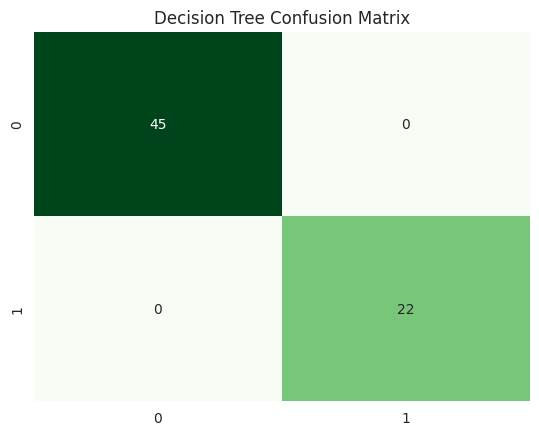

In [66]:
#Evaluating the model
y_pred = DT_model.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
DT_model_train_acc = round(accuracy_score(y_train,DT_model.predict(X_train))*100,2)
DT_model_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , DT_model_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Greens', cbar=False,)
plt.title('Decision Tree Confusion Matrix');

# Random Forest

In [67]:
##Random Forest
#Training the model
from sklearn.ensemble import RandomForestClassifier
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Accuracy =  100.0  %


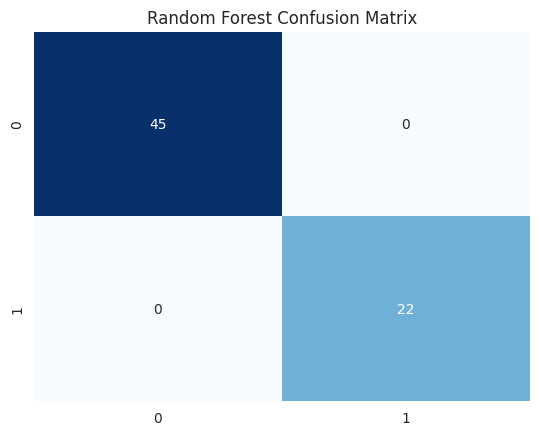

In [68]:
#Evaluating the model
y_pred = rdm_frst.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Random Forest Confusion Matrix');

# K-Nearest-Neighbour

In [57]:
###K-Nearest-Neighbour
##Training the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        47
           1       0.50      0.55      0.52        20

    accuracy                           0.70        67
   macro avg       0.65      0.66      0.65        67
weighted avg       0.71      0.70      0.71        67

Accuracy =  70.15  %


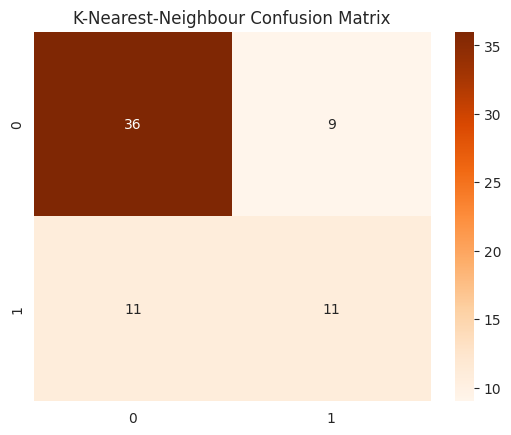

In [58]:
#Evaluating the model
y_pred = knn.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',knn_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Oranges')
plt.title('K-Nearest-Neighbour Confusion Matrix');

# Naive Bayes

In [59]:
##Naive Bayes
#Training the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Accuracy =  100.0  %


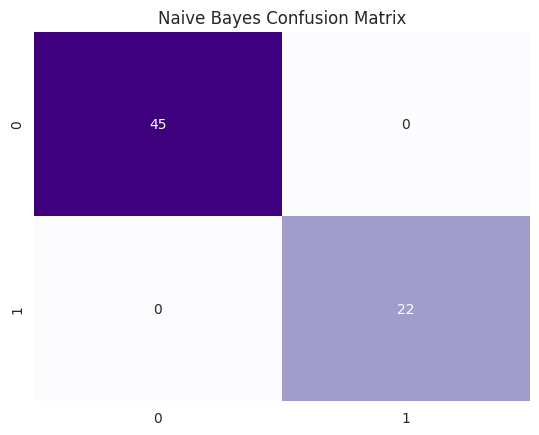

In [60]:
#Evaluating the model
y_pred = nb.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
nb_train_acc = round(accuracy_score(y_train,nb.predict(X_train))*100,2)
nb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , nb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Purples', cbar=False,)
plt.title('Naive Bayes Confusion Matrix');

# Comparing Classification Models

In [74]:
###Comparing Classification Models
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Gaussian Naive Bayes','Decision Tree',
        'Random Forest'],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,nb_train_acc,DT_model_train_acc,rdm_train_acc],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,nb_test_acc,DT_model_test_acc,rdm_test_acc
    ]})
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
0,Logistic Regression,100.00,100.00
2,Gaussian Naive Bayes,100.00,100.00
3,Decision Tree,100.00,100.00
4,Random Forest,100.00,100.00
1,K Nearest Neighbors,84.85,70.15


In [75]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='Oranges_r')

,Model,Training Accuracy,Model Accuracy Score
0,Logistic Regression,100.000000,100.000000
2,Gaussian Naive Bayes,100.000000,100.000000
3,Decision Tree,100.000000,100.000000
4,Random Forest,100.000000,100.000000
1,K Nearest Neighbors,84.850000,70.150000
